In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> $\mathbb{R}^2$ 中线性组合的可视化 </font>

考虑 $\mathbb{R}^2$ 中的两个向量 $u$ 和 $v$，它们彼此独立，即不指向相同或相反的方向。因此，$\mathbb{R}^2$ 中的任意向量都可以用 $u$ 和 $v$ 的线性组合表示。

例如，这是一个线性组合，实质上是一个线性系统。

$$
c_1
\left[
\begin{matrix}
4\\
2
\end{matrix}
\right]+
c_2
\left[
\begin{matrix}
-2\\
2
\end{matrix}
\right]
=
\left[
\begin{matrix}
2\\
10
\end{matrix}
\right]
$$

使用 SymPy 解决这个系统。

In [2]:
A = sy.Matrix([[4, -2, 2], [2,2,10]])
A.rref()

⎛⎡1  0  2⎤        ⎞
⎜⎢       ⎥, (0, 1)⎟
⎝⎣0  1  3⎦        ⎠

解是 $(c_1, c_2)^T = (2, 3)^T$，这意味着将 $\left[\begin{matrix}4\\2\end{matrix}\right]$ 的 $2$ 倍和 $\left[\begin{matrix}-2\\2\end{matrix}\right]$ 的 $3$ 倍相加等于 $\left[\begin{matrix}2\\10\end{matrix}\right]$。

除了绘制向量相加之外，我们还想绘制由 $u$ 和 $v$ 张成的**基座标**。我们将在后面的章节中进一步解释。

计算向量的斜率，如 $\frac{y}{x}$
$$
s_1 =\frac{y}{x} = \frac{2}{4}=.5\\
s_2 =\frac{y}{x}= \frac{2}{-2}=.-1
$$

基座标可以构建为：
$$
y_1 = a+.5x\\
y_2 = b-x
$$
其中 $a$ 和 $b$ 将被设置为常数，并以常规间隔设置，例如 $(2.5, 5, 7.5, 10)$。

基座标的坐标为粉红色的网格样式，每条线段在“新”坐标中是一个单位（类似于笛卡尔坐标系中的 $1$）。

<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
C:\Users\cyy\AppData\Local\Temp\ipykernel_27548\2664554302.py:37: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)


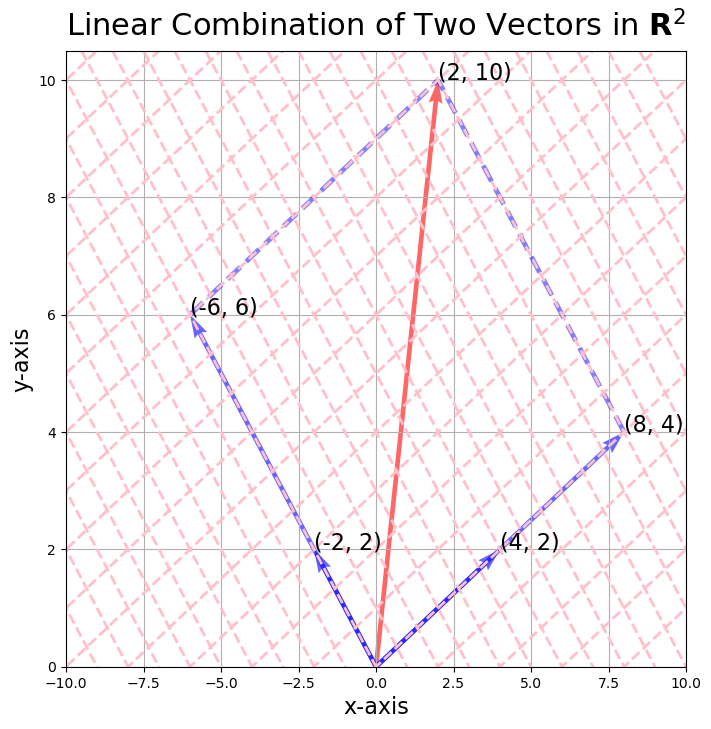

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))

vec = np.array([[[0,0,4,2]],
                 [[0,0,-2,2]],
                 [[0,0,2,10]],
                 [[0,0,8,4]], 
                 [[0,0,-6,6]]])
colors = ['b','b','r','b','b']

for i in range(vec.shape[0]):
    X,Y,U,V = zip(*vec[i,:,:])
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color = colors[i], scale=1, alpha = .6)
    ax.text(x = vec[i,0,2], y = vec[i,0,3], s = '(%.0d, %.0d)' %(vec[i,0,2],vec[i,0,3]), fontsize = 16)

points12 = np.array([[8,4],[2,10]])
ax.plot(points12[:,0], points12[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

points34 = np.array([[-6, 6],[2,10]])
ax.plot(points34[:,0], points34[:,1], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

ax.set_xlim([-10, 10])
ax.set_ylim([0, 10.5])
ax.set_xlabel('x-axis', fontsize =16)
ax.set_ylabel('y-axis', fontsize =16)
ax.grid()

######################################Basis########################################
a = np.arange(-11, 20, 1)
x = np.arange(-11, 20, 1)

for i in a:    
    y1 = i + .5*x
    ax.plot(x, y1, ls = '--', color = 'pink', lw = 2)
    y2 = i - x
    ax.plot(x, y2, ls = '--', color = 'pink', lw = 2)    

ax.set_title('Linear Combination of Two Vectors in $\mathbf{R}^2$', size = 22, x =0.5, y = 1.01)
plt.show()

# <font face="gotham" color="purple"> 在三维空间中的线性组合可视化</font>

我们还可以展示任何 $\mathbb{R}^3$ 中的向量都可以是笛卡尔坐标系中标准基座标的线性组合。

以下是用于绘制三维标准基座标线性组合的函数，我们只需输入 _标量乘数_。

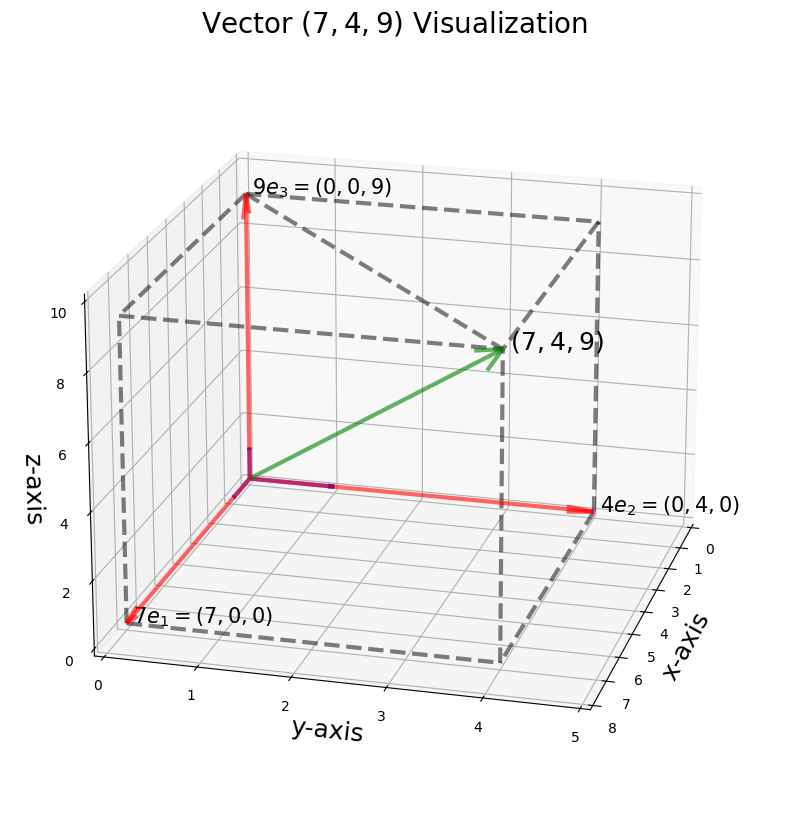

In [4]:
def linearCombo(a, b, c):
    '''This function is for visualizing linear combination of standard basis in 3D.
    Function syntax: linearCombo(a, b, c), where a, b, c are the scalar multiplier, 
    also the elements of the vector.
    '''
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ######################## Standard basis and Scalar Multiplid Vectors#########################
    vec = np.array([[[0, 0, 0, 1, 0, 0]], # e1
                    [[0, 0, 0, 0, 1, 0]], # e2
                    [[0, 0, 0, 0, 0, 1]], # e3
                    [[0, 0, 0, a, 0, 0]], # a* e1
                    [[0, 0, 0, 0, b, 0]], # b* e2
                    [[0, 0, 0, 0, 0, c]], # c* e3
                    [[0, 0, 0, a, b, c]]]) # ae1 + be2 + ce3
    colors = ['b','b','b','r','r','r','g']
    for i in range(vec.shape[0]): 
        X, Y, Z, U, V, W = zip(*vec[i,:,:])
        ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, 
                  color = colors[i] ,arrow_length_ratio = .08, pivot = 'tail',
                  linestyles = 'solid',linewidths = 3, alpha =.6)
    
    #################################Plot Rectangle Boxes##############################
    dlines = np.array([[[a, 0, 0],[a, b, 0]],
                      [[0, b, 0],[a, b, 0]],
                      [[0, 0, c],[a, b, c]],
                      [[0, 0, c],[a, 0, c]],
                      [[a, 0, c],[a, b, c]],
                      [[0, 0, c],[0, b, c]],
                      [[0, b, c],[a, b, c]],
                      [[a, 0, 0],[a, 0, c]],
                      [[0, b, 0],[0, b, c]],
                      [[a, b, 0],[a, b, c]]])
    colors = ['k','k','g','k','k','k','k','k','k']
    for i in range(dlines.shape[0]):
        ax.plot(dlines[i,:,0], dlines[i,:,1], dlines[i,:,2], lw =3, ls = '--', color = 'black', alpha=0.5)
    
    #################################Annotation########################################
    ax.text(x = a, y = b, z = c, s= ' $(%0.d, %0.d, %.0d)$'% (a, b, c), size = 18)
    ax.text(x = a, y = 0, z = 0, s= ' $%0.d e_1 = (%0.d, 0, 0)$'% (a, a), size = 15)
    ax.text(x = 0, y = b, z = 0, s= ' $%0.d e_2 = (0, %0.d, 0)$'% (b, b), size = 15)
    ax.text(x = 0, y = 0, z = c, s= ' $%0.d e_3 = (0, 0, %0.d)$' %(c, c), size = 15)
    
    #################################Axis Setting######################################
    ax.grid()
    ax.set_xlim([0, a+1])
    ax.set_ylim([0, b+1])
    ax.set_zlim([0, c+1])
    
    ax.set_xlabel('x-axis', size = 18)
    ax.set_ylabel('y-axis', size = 18)
    ax.set_zlabel('z-axis', size = 18)
    
    ax.set_title('Vector $(%0.d, %0.d, %.0d)$ Visualization' %(a, b, c), size = 20)
    
    ax.view_init(elev=20., azim=15)

if __name__ == '__main__':
    a = 7
    b = 4
    c = 9
    linearCombo(a, b, c)


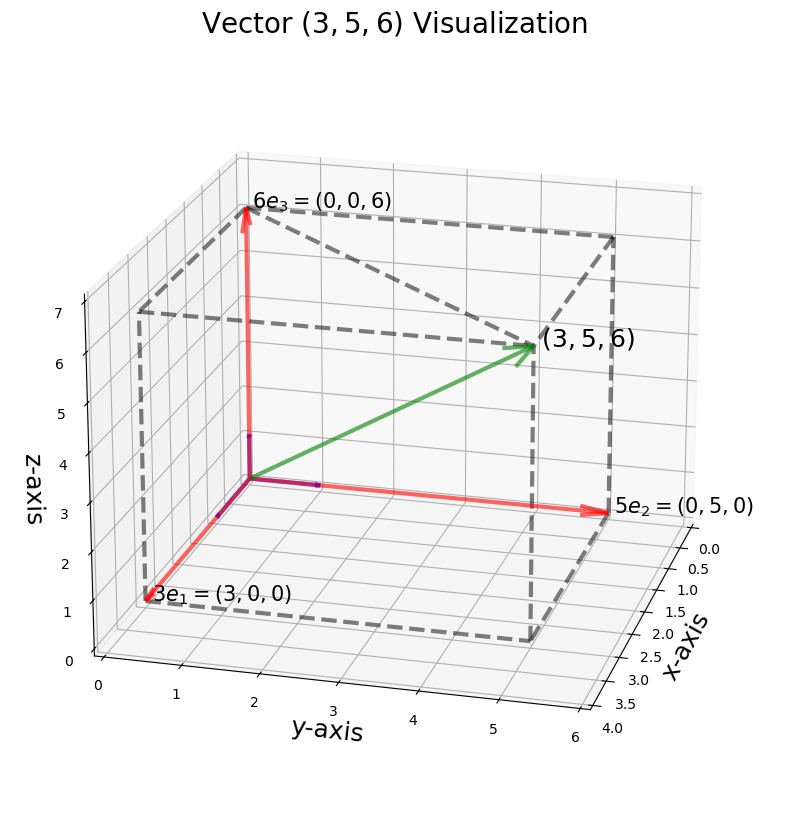

In [5]:
linearCombo(3, 5, 6) # 再试

# <font face="gotham" color="purple"> 不一致系统的线性组合</font>

不一致系统意味着不存在唯一解。将不一致系统的解视为线性组合可能听起来有些奇怪，但实质上它是一条直线的轨迹。

## <font face="gotham" color="purple"> 单自由变量情况</font>

我们已经在之前的讲座中看到了如何解决不一致系统。现在，我们将从线性组合的角度探讨解的含义。

考虑一个系统

$$
\left[
\begin{matrix}
1 & 1 & 2\\
-2 &0 & 1\\
1& 1 & 2
\end{matrix}
\right]
\left[
\begin{matrix}
c_1\\c_2\\c_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
1\\-3\\1
\end{matrix}
\right]
$$

在 SymPy 中求解：

In [6]:
A = sy.Matrix([[1,1,2,1],[-2,0,1,-3],[1,1,2,1]])
A.rref()

⎛⎡1  0  -1/2  3/2 ⎤        ⎞
⎜⎢                ⎥        ⎟
⎜⎢0  1  5/2   -1/2⎥, (0, 1)⎟
⎜⎢                ⎥        ⎟
⎝⎣0  0   0     0  ⎦        ⎠

由于存在一个自由变量，解不是唯一的：

$$
c_1 - \frac{1}{2}c_3 =\frac{3}{2}\\
c_2 + \frac{5}{2}c_3 = -\frac{1}{2}\\
c_3 = free
$$

设 $c_3 = t$，则该系统可以参数化为：

$$
\left[
\begin{matrix}
c_1\\c_2\\c_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
\frac{3}{2}+\frac{1}{2}t\\
-\frac{1}{2}-\frac{5}{2}t\\
t
\end{matrix}
\right]
$$

解是无限长度的直线，为了可视化它，我们设置 $t\in (-1, 1)$ 的范围，解看起来像：

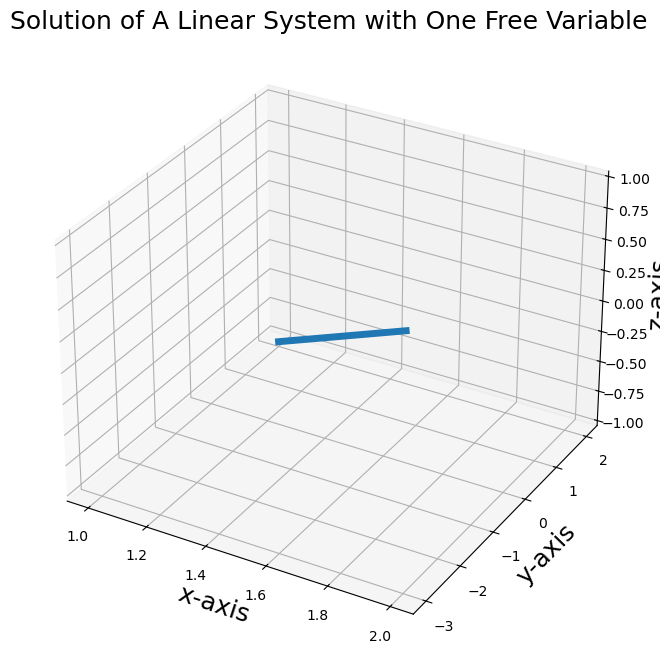

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

t = np.linspace(-1, 1, 10)
c1 = 3/2+t/2
c2 = -1/2-5/2*t

ax.plot(c1, c2, t, lw = 5)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.set_title('Solution of A Linear System with One Free Variable', size = 18)
plt.show()

## <font face="gotham" color="purple"> 两个自由变量情况</font>

现在考虑线性系统：
$$
\left[
\begin{matrix}
1 & -3 & -2\\
0 &0 & 0 \\
0& 0 & 0 
\end{matrix}
\right]
\left[
\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
0\\0\\0
\end{matrix}
\right]
$$
增广矩阵是
$$
\left[
\begin{matrix}
1 & -3 & -2 & 0\\
0 &0 & 0 & 0\\
0& 0 & 0 & 0
\end{matrix}
\right]
$$

我们有两个自由变量
$$
\begin{align}
x_1 &= 3x_2+2x_3\\
x_2 &= free\\
x_3 &= free
\end{align}
$$
解可以重写为：

$$
\left[
\begin{matrix}
x_1\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
3x_2+2x_3\\
x_2\\
x_3
\end{matrix}
\right]
=
\left[\begin{array}{c}
3 x_{2} \\
x_{2} \\
0
\end{array}\right]+\left[\begin{array}{c}
2 x_{3} \\
0 \\
x_{3}
\end{array}\right]=
x_{2}\left[\begin{array}{l}
3 \\
1 \\
0
\end{array}\right]+x_{3}\left[\begin{array}{l}
2 \\
0 \\
1
\end{array}\right]
$$

解是由两个向量 $(3, 1, 0)^T$ 和 $(2, 0, 1)^T$ 张成的平面。让我们绘制平面和张成向量。

我们还绘制另一个向量 $v = (2,2,1)$，它不是 $(3, 1, 0)^T$ 和 $(2, 0, 1)^T$ 的线性组合。当您在视角周围移动时（在 JupyterLab 中使用 ```%matplotlib widge```），很明显 $v$ 不在基座标的平面上。

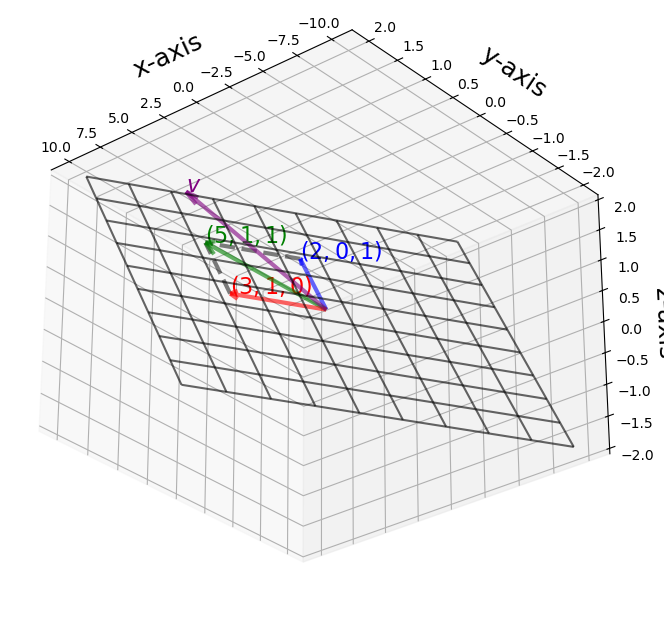

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

x2 = np.linspace(-2, 2, 10)
x3 = np.linspace(-2, 2, 10)
X2, X3 = np.meshgrid(x2, x3)
X1 = 3*X2 + 2*X3
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, color = 'k', alpha = .6)

vec = np.array([[[0, 0, 0, 3, 1, 0]],
               [[0, 0, 0, 2, 0, 1]],
               [[0, 0, 0, 5, 1, 1]],
               [[0, 0, 0, 2, 2, 1]]])
colors = ['r', 'b', 'g', 'purple']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

################################Dashed Line################################

point12 = np.array([[2, 0, 1],[5, 1, 1]])
ax.plot(point12[:,0], point12[:,1], point12[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

point34 = np.array([[3, 1, 0], [5, 1, 1]])
ax.plot(point34[:,0], point34[:,1], point34[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

#################################Texts#######################################
ax.text(x = 3, y = 1, z = 0, s='$(3, 1, 0)$', color = 'red', size = 16)
ax.text(x = 2, y = 0, z = 1, s='$(2, 0, 1)$', color = 'blue', size = 16)
ax.text(x = 5, y = 1, z = 1, s='$(5, 1, 1)$', color = 'green', size = 16)
ax.text(x = 2, y = 2, z = 1, s='$v$', color = 'purple', size = 16)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=130)

# <font face="gotham" color="purple">多项式的线性组合</font>

在更一般的情况下，一个函数或多项式也可以是其他函数或多项式的线性组合。

现在考虑一个多项式 $p(x)=4 x^{3}+5 x^{2}-2 x+7$，确定它是否是以下三个多项式的线性组合：
$$
p_{1}(x)=x^{3}+2 x^{2}-x+1\\
p_{2}(x)=2 x^{3}+x^{2}-x+1\\
p_{3}(x)=x^{3}-x^{2}-x-4
$$

这意味着我们需要弄清楚下面的方程是否成立：

$$
c_{1}\left(x^{3}+2 x^{2}-x+1\right)+c_{2}\left(2 x^{3}+x^{2}-x+1\right)+c_{3}\left(x^{3}-x^{2}-x-4\right)=4 x^{3}+5 x^{2}-2 x+7
$$

重新排列并整理项
$$
\left(c_{1}+2 c_{2}+c_{3}\right) x^{3}+\left(2 c_{1}+c_{2}-c_{3}\right) x^{2}+\left(-c_{1}-c_{2}-c_{3}\right) x+\left(c_{1}+c_{2}-4 c_{3}\right)=4 x^{3}+5 x^{2}-2 x+7
$$

将系数相等并提取增广矩阵
$$
\begin{aligned}
&c_{1}+2 c_{2}+c_{3}=4\\
&2 c_{1}+c_{2}-c_{3}=5\\
&-c_{1}-c_{2}-c_{3}=-2\\
&c_{1}+c_{2}-4 c_{3}=7\\
&\left[\begin{array}{cccc}
1 & 2 & 1 & 3 \\
2 & 1 & -1 & 5 \\
-1 & -1 & -1 & -2 \\
1 & 1 & -4 & 7
\end{array}\right]
\end{aligned}
$$

在解之前，我们注意到这个系统有 4 个方程，但只有 3 个未知数，这种情况被称为**超定**。

In [9]:
A = sy.Matrix([[1,2,1,4],[2,1,-1,5],[-1,-1,-1,-2],[1,1,-4,7]])
A.rref()

⎛⎡1  0  0  1 ⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  2 ⎥           ⎟
⎜⎢           ⎥, (0, 1, 2)⎟
⎜⎢0  0  1  -1⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  0  0 ⎦           ⎠

我们得到答案 $(c_1, c_2, c_3)^T = (1, 2, -1)^T$，将其代回方程
$$
\left(x^{3}+2 x^{2}-x+1\right)+2\left(2 x^{3}+x^{2}-x+1\right)-\left(x^{3}-x^{2}-x-4\right)=4 x^{3}+5 x^{2}-2 x+7
$$
确实，我们刚刚建立了这些多项式之间的线性组合关系。